In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Import Data

In [36]:
WTI = pd.read_excel("Data/Cushing_OK_WTI_Spot_Price_FOB_Daily.xlsx", dtype='unicode', skiprows=4)
WCS = pd.read_excel("Data/wcs-daily-bblUSD.xlsx", dtype='unicode', skiprows=2)

# 2. Rename Columns and Drop Extra Columns

In [3]:
WTI.rename(columns={"Day": "Date", "Series ID: PET.RWTC.D Dollars per Barrel": "WTI"}, inplace=True)
WCS.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6'], inplace=True, axis=1)
WCS.rename(columns={"Unnamed: 0": "Date", "Unnamed: 5": "WCS"}, inplace=True)

In [4]:
WTI

,Date,WTI
0,08/11/2020,41.53
1,08/10/2020,41.94
2,08/7/2020,41.16
3,08/6/2020,41.93
4,08/5/2020,42.25
5,08/4/2020,41.67
6,08/3/2020,40.83
7,07/31/2020,40.1
8,07/30/2020,39.85
9,07/29/2020,41.13


In [5]:
WCS

,Date,WCS
0,2020-07-01 00:00:00,31.592903672183603
1,2020-07-02 00:00:00,nan
2,2020-07-03 00:00:00,nan
3,2020-07-04 00:00:00,nan
4,2020-07-05 00:00:00,nan
5,2020-07-06 00:00:00,33.23144314528681
6,2020-07-07 00:00:00,33.0750943721266
7,2020-07-08 00:00:00,31.297622980832678
8,2020-07-09 00:00:00,32.297345275237745
9,2020-07-10 00:00:00,nan


# 3. Convert String Dates to DateTime

In [6]:
WTI['DateTime'] = pd.to_datetime(WTI['Date'], format="%m/%d/%Y")

In [7]:
WCS['DateTime'] = pd.to_datetime(WCS['Date'], format="%Y-%m-%d %H:%M:%S.%f")

In [55]:
WTI

,Date,WTI,DateTime
0,08/11/2020,41.53,2020-08-11
1,08/10/2020,41.94,2020-08-10
2,08/7/2020,41.16,2020-08-07
3,08/6/2020,41.93,2020-08-06
4,08/5/2020,42.25,2020-08-05
5,08/4/2020,41.67,2020-08-04
6,08/3/2020,40.83,2020-08-03
7,07/31/2020,40.1,2020-07-31
8,07/30/2020,39.85,2020-07-30
9,07/29/2020,41.13,2020-07-29


In [58]:
WCS

,Date,WCS,DateTime
0,2020-07-01 00:00:00,31.592903672183603,2020-07-01
1,2020-07-02 00:00:00,nan,2020-07-02
2,2020-07-03 00:00:00,nan,2020-07-03
3,2020-07-04 00:00:00,nan,2020-07-04
4,2020-07-05 00:00:00,nan,2020-07-05
5,2020-07-06 00:00:00,33.23144314528681,2020-07-06
6,2020-07-07 00:00:00,33.0750943721266,2020-07-07
7,2020-07-08 00:00:00,31.297622980832678,2020-07-08
8,2020-07-09 00:00:00,32.297345275237745,2020-07-09
9,2020-07-10 00:00:00,nan,2020-07-10


# 4. Merge the two tables of WTI and WCS

In [14]:
Join_WTI_WCS = pd.merge(WTI[['WTI', 'DateTime']], WCS[['WCS','DateTime']], on=['DateTime'])

# 5. Calculate the difference between WTI and WCS

## 5.1. Handle the missing values

In [15]:
Join_WTI_WCS['WCS'] = Join_WTI_WCS['WCS'].replace('nan', np.nan)
Join_WTI_WCS['WTI'] = Join_WTI_WCS['WTI'].replace('nan', np.nan)

In [16]:
Join_WTI_WCS.isnull().sum()

WTI          0
DateTime     0
WCS         16
dtype: int64

## 5.2. Interpolating the missing values of WCS and the outliers of WTI

In [24]:
# convert the numerical columns from string to float
for item in ['WTI', 'WCS']:
    Join_WTI_WCS[item] = Join_WTI_WCS[item].astype(float)

In [25]:
# Use linear interpolation
Join_WTI_WCS['WCS_Interpolated'] = Join_WTI_WCS['WCS'].interpolate()

In [11]:
Join_WTI_WCS.dropna(axis=0, inplace=True)

In [22]:
Join_WTI_WCS

,WTI,DateTime,WCS,WCS_Interpolated
0,40.10,2020-07-31,30.227066,30.227066
1,39.85,2020-07-30,30.202295,30.202295
2,41.13,2020-07-29,30.390210,30.390210
3,40.89,2020-07-28,31.368747,31.368747
4,41.46,2020-07-27,31.544149,31.544149
5,41.23,2020-07-24,NaN,31.599193
6,40.99,2020-07-23,31.654236,31.654236
7,41.88,2020-07-22,31.282241,31.282241
8,41.76,2020-07-21,32.247734,32.247734
9,40.83,2020-07-20,32.301582,32.301582


In [23]:
Join_WTI_WCS.isnull().sum()

WTI                  0
DateTime             0
WCS                 16
WCS_Interpolated     0
dtype: int64

## 5.3. Calculate the difference between WTI and WCS_Interpolated

In [29]:
Join_WTI_WCS['WTI_WCS_diff'] = Join_WTI_WCS['WTI'] -  Join_WTI_WCS['WCS_Interpolated']

In [30]:
Join_WTI_WCS.describe()

,WTI,WCS,WCS_Interpolated,WTI_WCS_diff
count,655.00000,639.000000,655.000000,655.000000
mean,55.65374,37.429782,37.474739,18.179002
std,13.45746,11.188911,11.088780,9.609269
min,-36.98000,3.803677,3.803677,-46.193772
25%,52.42500,32.980337,32.980337,11.551970
50%,57.79000,38.732487,38.732487,15.917293
75%,64.33500,44.315602,44.295544,23.685079
max,77.41000,57.963021,57.963021,49.977376


In [31]:
Join_WTI_WCS

,WTI,DateTime,WCS,WCS_Interpolated,WTI_WCS_diff
0,40.10,2020-07-31,30.227066,30.227066,9.872934
1,39.85,2020-07-30,30.202295,30.202295,9.647705
2,41.13,2020-07-29,30.390210,30.390210,10.739790
3,40.89,2020-07-28,31.368747,31.368747,9.521253
4,41.46,2020-07-27,31.544149,31.544149,9.915851
5,41.23,2020-07-24,NaN,31.599193,9.630807
6,40.99,2020-07-23,31.654236,31.654236,9.335764
7,41.88,2020-07-22,31.282241,31.282241,10.597759
8,41.76,2020-07-21,32.247734,32.247734,9.512266
9,40.83,2020-07-20,32.301582,32.301582,8.528418


# 6. Plotting

## 6.1. Plot WTI and WCS over time

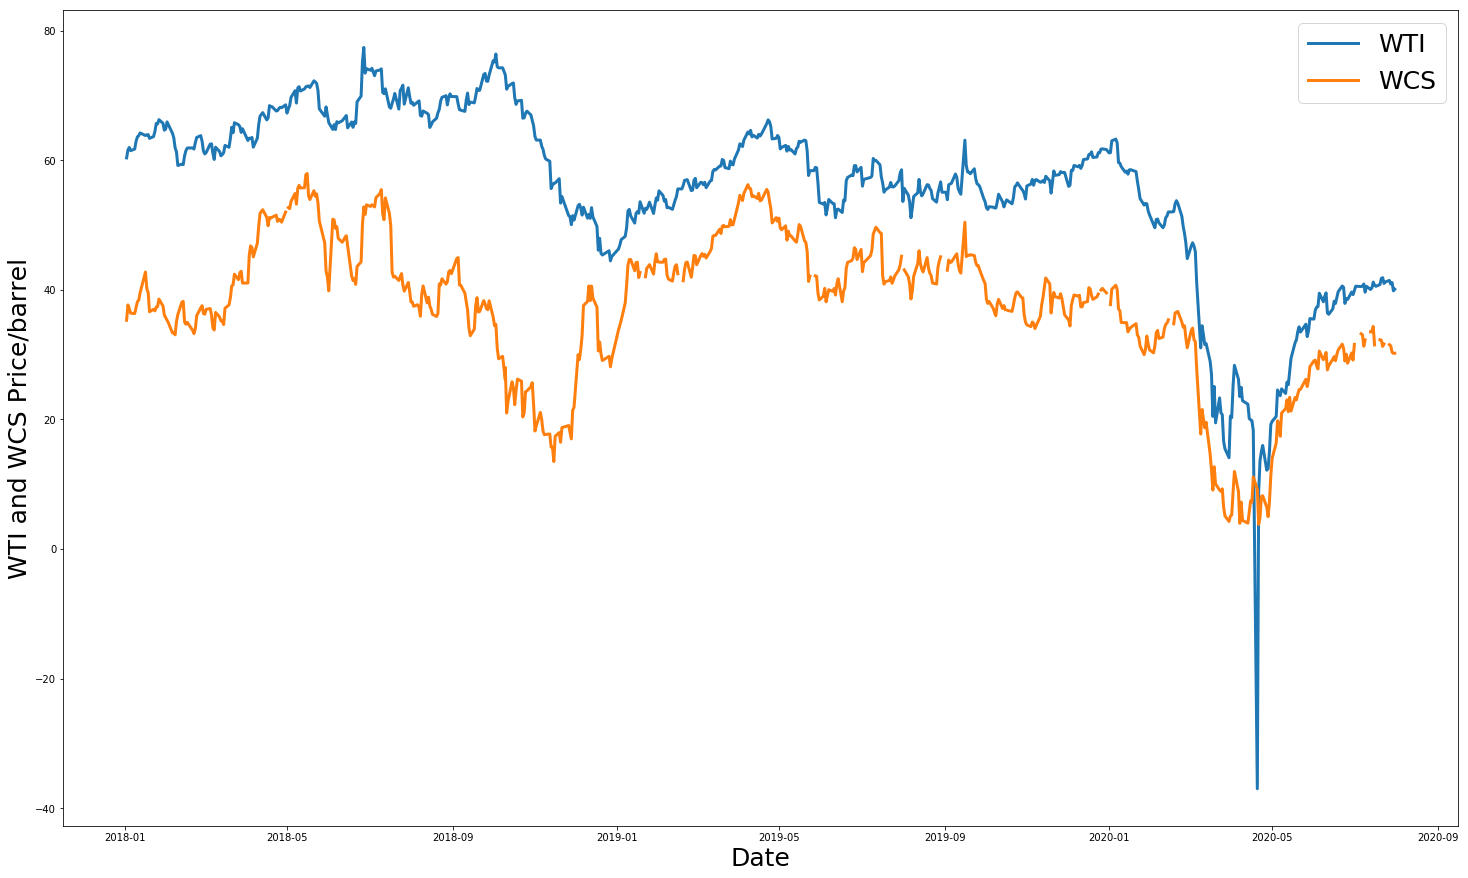

In [27]:
x = Join_WTI_WCS['DateTime']
y1 = Join_WTI_WCS['WTI']
y2 = Join_WTI_WCS['WCS']
plt.figure(figsize=(25, 15))
plt.plot(x, y1, linewidth=3)
plt.plot(x, y2, linewidth=3)
plt.xlabel('Date', fontsize=25)
plt.ylabel('WTI and WCS Price/barrel', fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.show()

## 6.2. Plot the difference between WTI and WCS over time 

In [129]:
Join_WTI_WCS.head(80)

,WTI,DateTime,WCS,WTI_WCS_diff
0,40.10,2020-07-31,30.227066,9.872934
1,39.85,2020-07-30,30.202295,9.647705
2,41.13,2020-07-29,30.390210,10.739790
3,40.89,2020-07-28,31.368747,9.521253
4,41.46,2020-07-27,31.544149,9.915851
6,40.99,2020-07-23,31.654236,9.335764
7,41.88,2020-07-22,31.282241,10.597759
8,41.76,2020-07-21,32.247734,9.512266
9,40.83,2020-07-20,32.301582,8.528418
11,40.74,2020-07-16,31.506038,9.233962


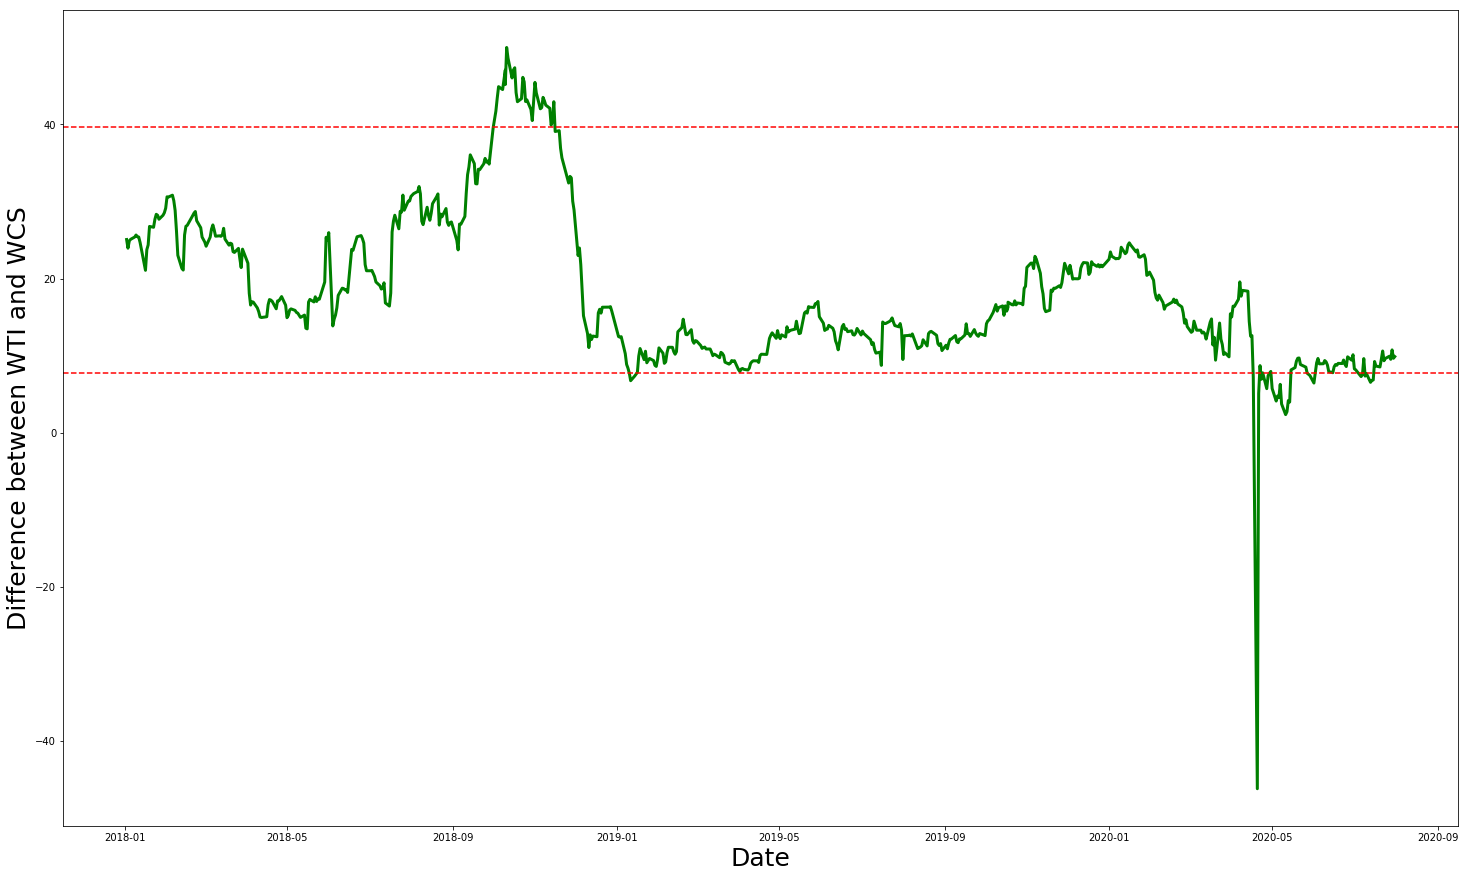

In [35]:
x = Join_WTI_WCS['DateTime']
y = Join_WTI_WCS['WTI_WCS_diff']
plt.figure(figsize=(25, 15))
plt.plot(x, y, c='g', linewidth=3)
plt.axhline(39.67187956178252, c='r', linestyle= '--')
plt.axhline(7.753828507874972, c='r', linestyle= '--')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Difference between WTI and WCS', fontsize=25)
plt.show()

In [34]:
for q in [5, 10, 90, 95]:
    print ("{}%% percentile: {}".format (q, np.percentile(Join_WTI_WCS['WTI_WCS_diff'], q)))

5%% percentile: 7.753828507874972
10%% percentile: 8.908761330573343
90%% percentile: 30.58753821776495
95%% percentile: 39.67187956178252


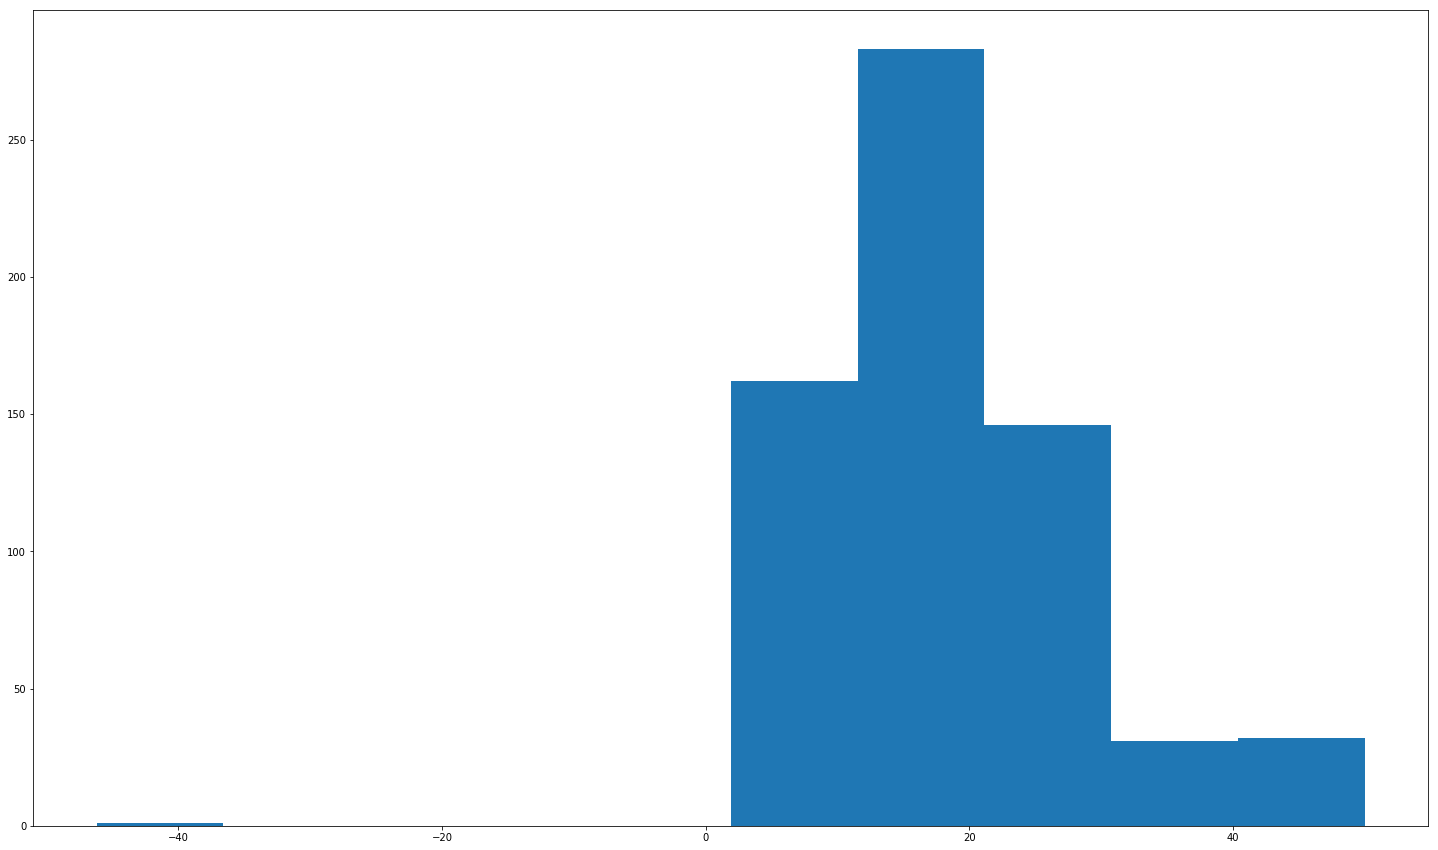

In [33]:
x = Join_WTI_WCS['DateTime']
y = Join_WTI_WCS['WTI_WCS_diff']
plt.figure(figsize=(25, 15))
plt.hist(y)
plt.show()